# import Dependencies

### Siamese networks
##### Here we are gonna use a Siamese network. It allows us to do one shot classification. We can pass through two images and we can determine if the two images are same or not.
### showing the research paper related to Siamese networks

In [5]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)
PDF('oneshot1.pdf',size=(800,700))

### Showing the Siamese networks architechture
##### We re passing through two images at the same time
##### We have distance layer --> This measures the similarities between the two images
##### We are gonna train a neural network as to what those similarities are like. If the images are very similar then we are gonna output to one i.e the output is verified and if the two images are very different then we are gonna output to zero i.e the output is not-verified.

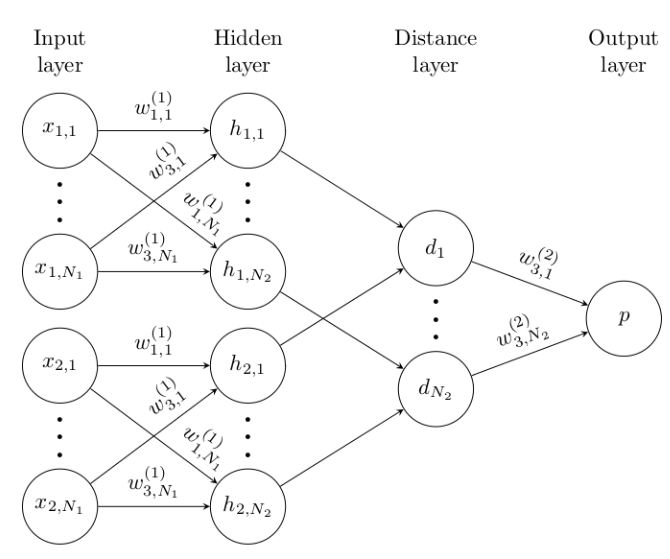

In [7]:
from IPython.display import Image
Image("images/neural_netwrok_architecture_cnn_Siamese_networks.png", width=600, height=600)

### Showing the Siamese networks Layer architecture

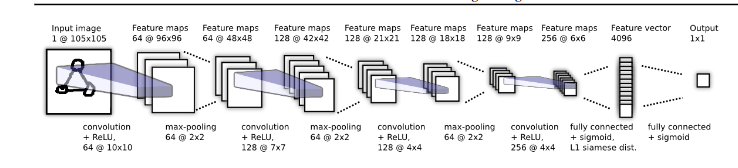

In [9]:
from IPython.display import Image
Image("images/layer_architecture.png", width=600, height=600)

### Importing tensorflow components
##### tensorflow functional apis are much more flexible when it comes to building more hardcore deep learning models

### ```from tensorflow.keras.models import Model```
##### this is the most important layer that we are gonna need. So when you are defining the model using functional api using model you are gonna pass in ``` Model(inputs = , outputs = ) ```. Here we are gonna pass the inputs and the outputs. It allows us to build more sophisticated neural network.
##### input = [input_image, verification_image], outputs = [1, 0] That's how this model class is used.
### ``` from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten ```
#### Layer class : 
##### This allows us to define a custom layer in our neural network. 
##### How do we generate a custom layer using this Layer class
##### syntax : class L1Distance(Layer) --> This effectively allows us to create a custom neural network layer via inheritance.
#### Conv2D : 
##### This allows us to do convolutions.
#### Dense
##### This gives us fully connected layer.
#### MaxPooling2D
##### This allows us to pool all of our layers in our neural network and effectively shrinks the information that we've actually got.
#### Input
##### It allows us to define what we are passing through to our model.
##### syntax : input(shape = )
#### Flatten
##### It takes all the information from the previous layer and flattens it down to a single dimension. this allows us to pass the information from a convolution layer to the dense layer.

In [11]:
# importing model components
# importing deep learning layers
# import tensorflow functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

### Importing Data pre-processing standard dependencies and computer vision dependencies

##### ```import OS ``` will be used when we create our folder structures. we are going to use this to abstract our operating system from our python code. This just helps 
##### ```import random``` random helps during testing and generating our model and data 
##### how to see information about libraries that you have just imported ``` plt.imshow?? ```

In [2]:
import cv2 # importing open cv into our notebook
import os # This an os library 
import random 
import numpy as np
from matplotlib import pyplot as plt

# Setup GPU growth
##### Here we are limiting how much vram tensorflow can use on the gpu. Because by default Tensoflow will expand to take it all the gpu vram that's available and this can cause some serious problems. and you will face out of memory errors.
##### avoid out of memory errors on the gpu by setting up the memory consumtion growth.
## gpus = tf.config.experimental.list_physical_devices('GPU')
##### accesing all of the different gpus that are present in my workstation
## for gpu in gpus : 
##### looping through all of the gpus
## tf.config.experimental.set_memory_growth(gpu,True)
##### This is used to set our memory growth

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus : 
    tf.config.experimental.set_memory_growth(gpu,True)

2023-12-03 19:30:39.263724: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-12-03 19:30:39.333397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 19:30:39.333510: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2023-12-03 19:30:39.354584: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-12-03 19:30:39.606218: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-12-03 19:30:39.723910: I tensorflow/stream_executor/pl

# Create Our folder structure
### anchor folder
##### when we are going to perform our facial verification we are gonna pass two images, we are gonna pass an image called anchor and a verification image (positive or negative image)
##### anchor folder contains an input image for exmample images coming from webcam, smartphone camera etc...
### positive folder
##### we are gonna make sure that the images in this when compared to anchor gives us same i.e 1
### negative folder
##### we are gonna make sure that the images in this when compared to anchor gives us same i.e 0
#### we want the model to return 1 when it compares the images in anchor folder to positive folder images and 0 when we pare the anchor and negative folder images. because we want the model to differentiate ourseleves form other objects when we pass the images in the anchor folder via webcam.

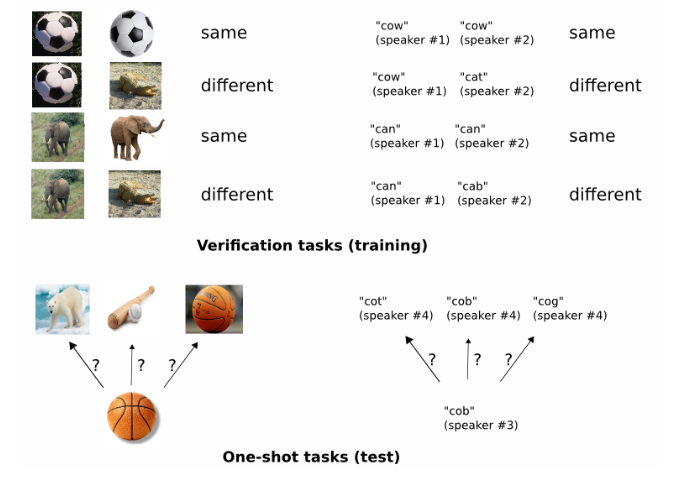

In [13]:
from IPython.display import Image
Image("images/working.png", width=600, height=600)

#### setting up paths

In [14]:
Positive_folder_path = os.path.join('data', 'positive')
Negative_folder_path = os.path.join('data', 'negative')
Anchor_folder_path = os.path.join('data', 'anchor')

# start the video from this time stamp
##### https://youtu.be/LKispFFQ5GU?list=PLAHgAk2ZrQwgmvoqMaCFiUJt6x7MCP6_d&t=1266